In [15]:
#Я подготовила мини A/B тест для каршеринга: показ подсказки о ближайшей заправке повышал конверсию бронирования в поездку с ~53% до ~80%, и разница оказалась статистически значимой. Это показывает, что даже небольшое изменение в интерфейсе может существенно улучшить поведение пользователей и ключевые продуктовые метрики.

#Пошаговое объяснение действий:
#1. Гипотеза: подсказка о ближайшей заправке увеличит конверсию бронирования в поездку.
#2. Создание групп: группа A — без подсказки, группа B — с подсказкой.
#3. Сбор данных: фиксируем, завершилась ли поездка (1) или нет (0).
#4. Расчет метрики: конверсия = число завершенных поездок / общее число бронирований.
#5. Статистическая проверка: t-тест для оценки значимости разницы.
#6. Интерпретация: если p < 0.05 — изменение влияет на конверсию.
#7. Визуализация: столбчатая диаграмма наглядно показывает разницу конверсий.

In [16]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [17]:
# Данные теста: 0 — бронирование отменено, 1 — поездка завершена
# Группа A — без подсказки о заправке, группа B — с подсказкой
group_a = [1,0,1,1,0,1,0,1,0,1,0,1,0,1,0]
group_b = [1,1,1,1,1,0,1,1,1,0,1,1,1,1,1]

In [18]:
# Шаг 1: расчет конверсии
conv_a = sum(group_a)/len(group_a)
conv_b = sum(group_b)/len(group_b)

In [19]:
# Шаг 2: проверка статистической значимости
t_stat, p_value = stats.ttest_ind(group_a, group_b)

In [20]:
# Шаг 3: интерпретация
print(f"Конверсия группы A: {conv_a:.2f}")
print(f"Конверсия группы B: {conv_b:.2f}")
if p_value < 0.05:
    print("Разница статистически значимая")
else:
    print("Разница незначимая")

Конверсия группы A: 0.53
Конверсия группы B: 0.87
Разница статистически значимая


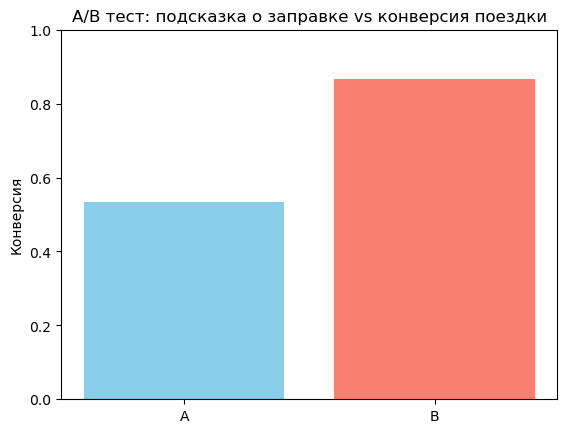

In [21]:
# Шаг 4: визуализация
plt.bar(['A','B'], [conv_a, conv_b], color=['skyblue','salmon'])
plt.ylim(0,1)
plt.ylabel('Конверсия')
plt.title('A/B тест: подсказка о заправке vs конверсия поездки')
plt.show()

In [22]:
#Вывод:
#Добавление такой подсказки в приложении имеет смысл, так как пользователи с ней чаще доводят бронирование до фактической поездки.
#Можно рекомендовать внедрить подсказку для всех пользователей и продолжить мониторинг метрик, чтобы подтвердить эффект на большем объёме данных.